# Countries of the World - World Fact Sheet


In [7]:
import numpy as np 
import pandas as pd
import sklearn
import pickle
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
world = pd.read_csv("C:/Users/Atharva/Downloads/world.csv",decimal=',')

In [8]:
model = pickle.load(open('D:\\django venv\\countries_world\\world_gdp\\model\\finalized_model.sav', 'rb'))

training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Region_label',
       'Climate_label']
df = pd.DataFrame(columns = training_features)
df = df.append({'Population':500000000, 'Area (sq. mi.)':3287263,
       'Pop. Density (per sq. mi.)':152.0, 'Coastline (coast/area ratio)':2.0,
       'Net migration':0.0, 'Infant mortality (per 1000 births)':5,
       'Literacy (%)':99.0, 'Phones (per 1000)':1000,
       'Arable (%)':60, 'Crops (%)':10, 'Other (%)':30, 'Birthrate':10,
       'Deathrate':5, 'Region_label':0,
       'Climate_label':0},ignore_index = True)
#model = WorldGdpConfig.randomForest
pred = model.predict(df)

E:\Ana\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
E:\Ana\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
E:\Ana\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk

In [9]:
pred

array([21020.03552004])

# Data Pre-processing

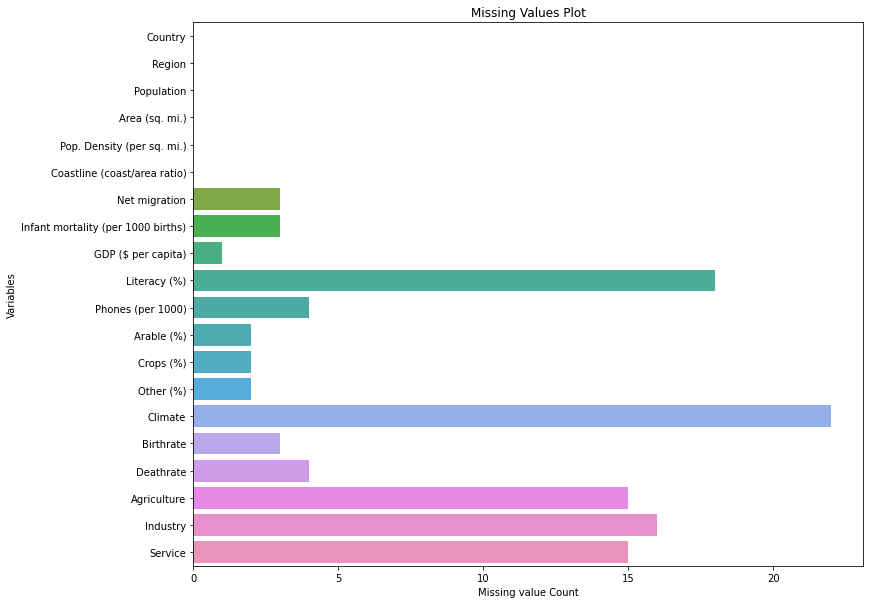

In [4]:
plt.figure(figsize=(12,10))
sns.barplot(data=world.isnull().sum().reset_index(), y='index',x=0)
plt.ylabel('Variables')
plt.title('Missing Values Plot')
plt.xlabel('Missing value Count')
plt.show()

## The missing data is filled using the median of the region that a country belongs, as countries that are close geologically are often similar in many ways

In [5]:
for col in world.columns.values:
    if world[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = world.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = world.groupby('Region')[col].median()
    for region in world['Region'].unique():
        world[col].loc[(world[col].isnull())&(world['Region']==region)] = guess_values[region]

C:\Users\Atharva\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
world.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

# Data Exploration
## Top Countries with highest GDP per capita

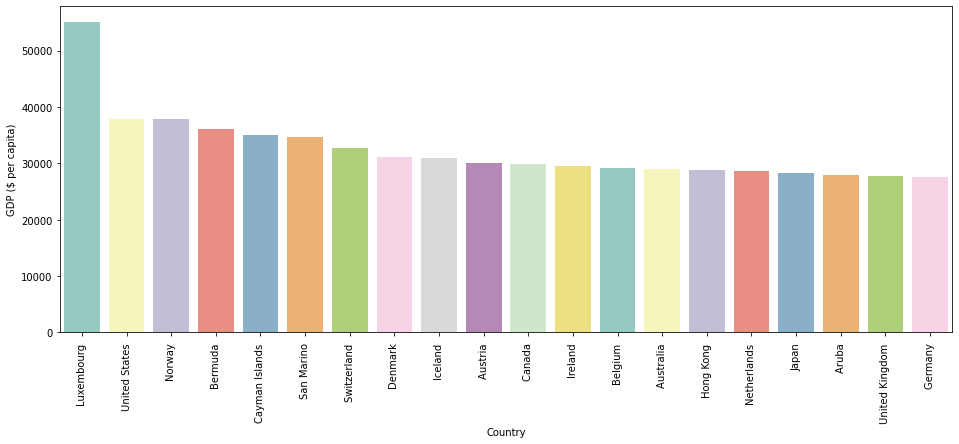

In [7]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country',y='GDP ($ per capita)',data=world.sort_values('GDP ($ per capita)',ascending=False).head(20), palette='Set3')
plt.xticks(rotation=90)
plt.show()

## Top Countries with lowest GDP per capita

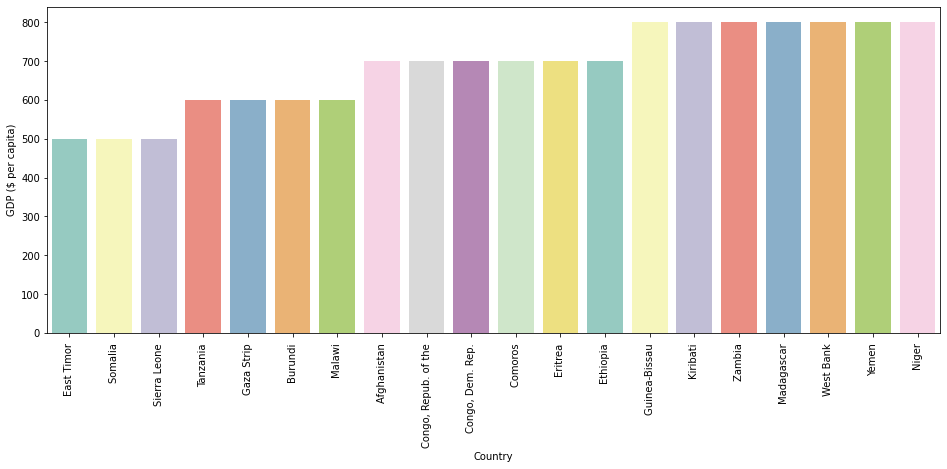

In [8]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country',y='GDP ($ per capita)',data=world.sort_values('GDP ($ per capita)',ascending=True).head(20), palette='Set3')
plt.xticks(rotation=90)
plt.show()

# Top Countries with highest Total GDP

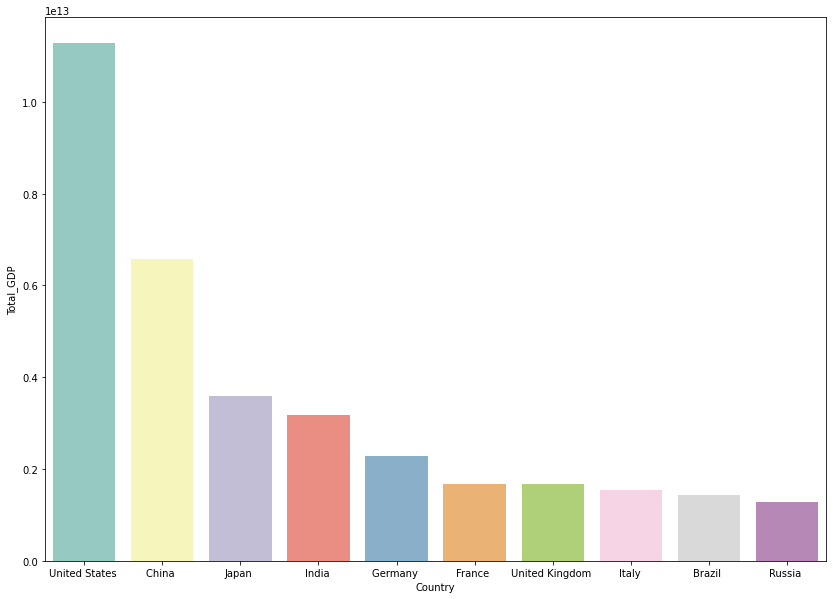

In [9]:
world['Total_GDP'] = world['GDP ($ per capita)'] * world['Population']
plt.figure(figsize=(14,10))

sns.barplot(x='Country',y='Total_GDP',data=world.sort_values('Total_GDP',ascending=False).head(10),palette='Set3')

# Share of Total GDP of Top 25 countries

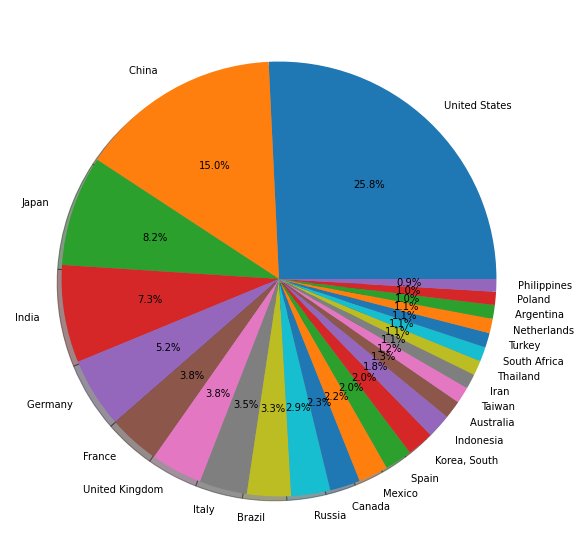

In [10]:
plt.subplots(figsize=(14,10))
gdp=world.sort_values('Total_GDP',ascending=False).head(25)
plt.pie(gdp['Total_GDP'],labels=gdp['Country'],autopct='%1.1f%%',shadow=True);

#  Total GDP per capita by Region

Text(0.5, 1.0, 'GDP BY REGİON')

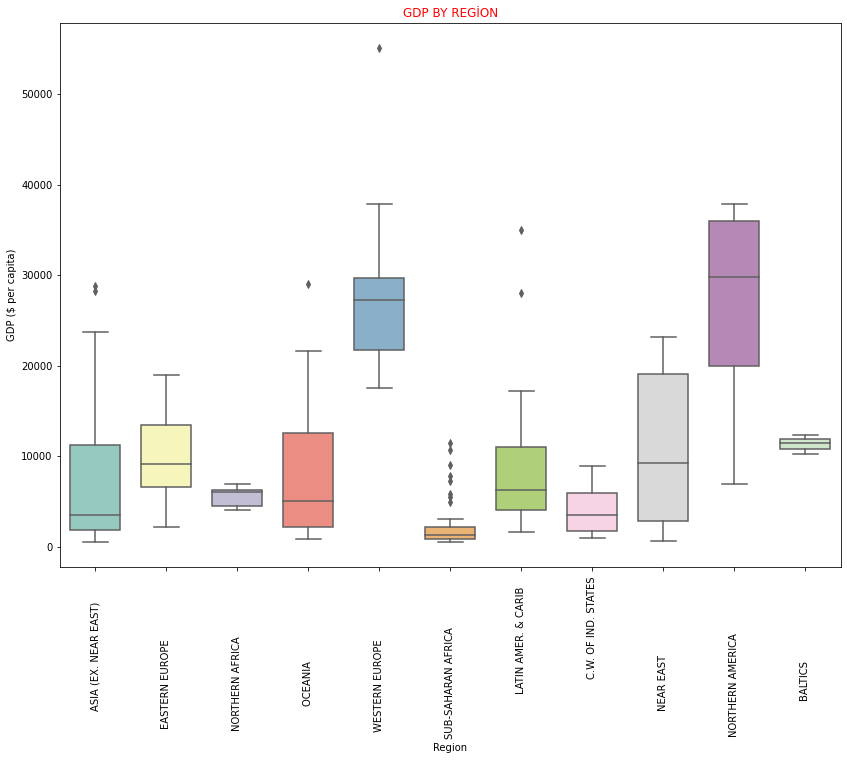

In [11]:
plt.figure(figsize=(14,10))
sns.boxplot(x="Region",y="GDP ($ per capita)",data=world,width=0.7,palette="Set3",fliersize=5)
plt.xticks(rotation=90)
plt.title("GDP BY REGİON",color="red")

# Correlation between Variables

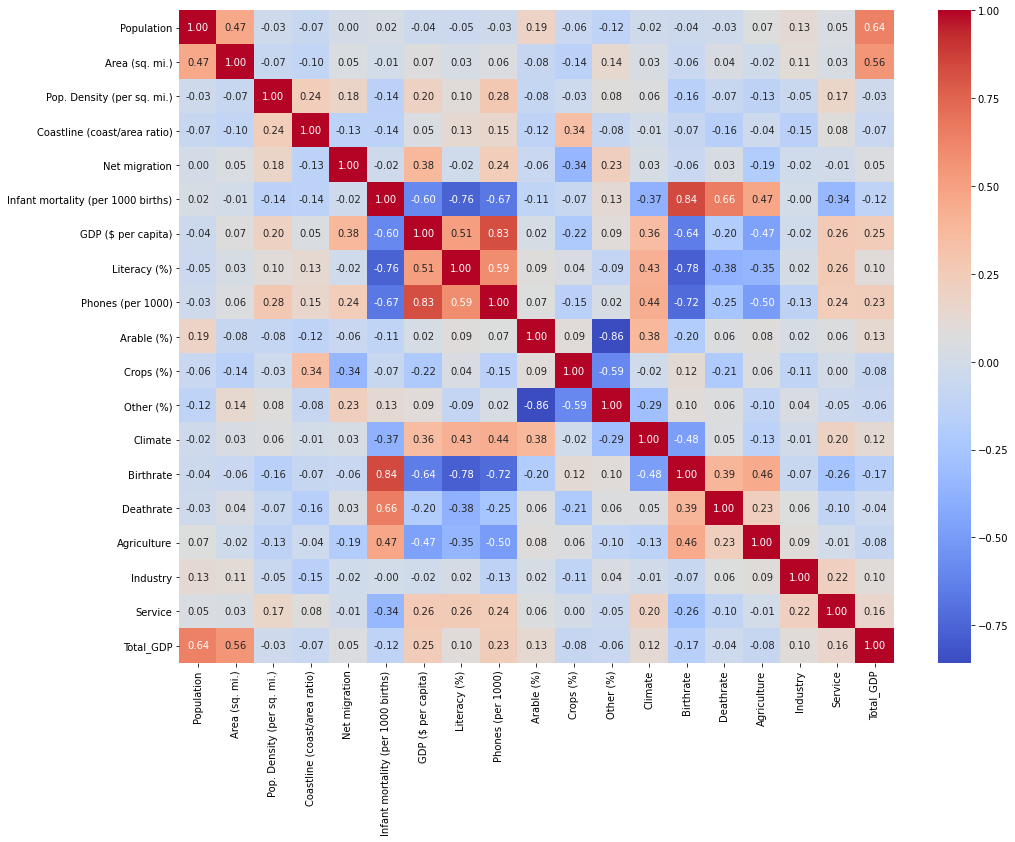

In [12]:
plt.figure(figsize=(16,12))
sns.heatmap(data=world.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

# Top Factors affecting GDP per capita
## We pick the five columns that mostly correlate to GDP per capita and make scatter plots.

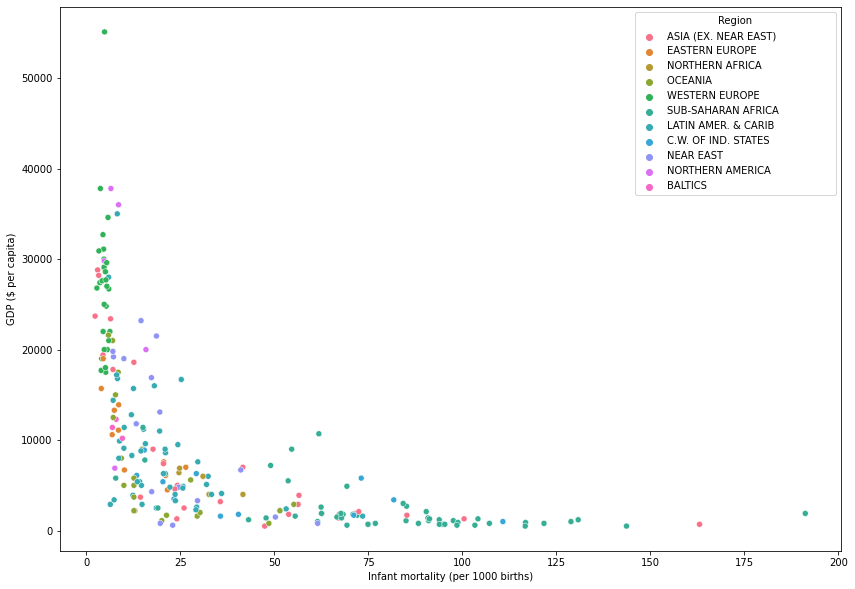

In [13]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Infant mortality (per 1000 births)',y='GDP ($ per capita)',hue='Region')

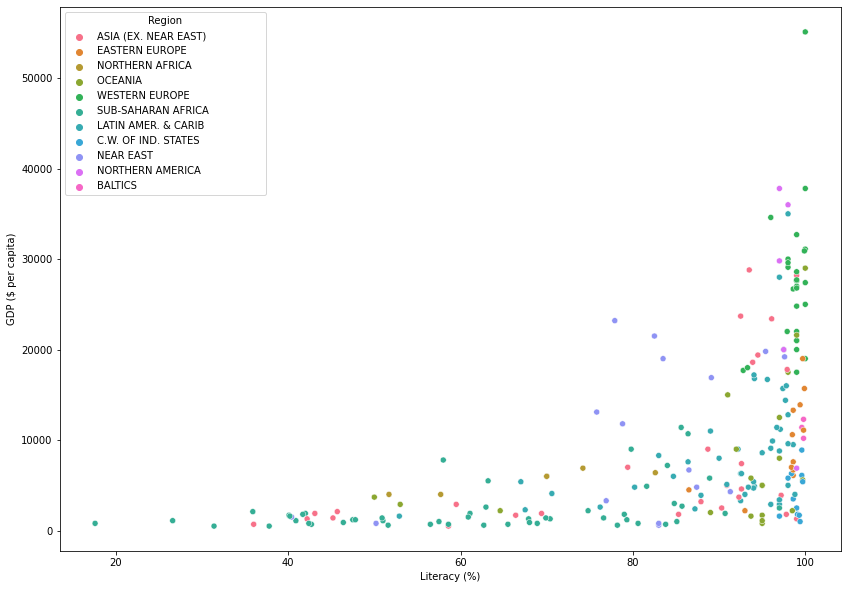

In [14]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Literacy (%)',y='GDP ($ per capita)',hue='Region')

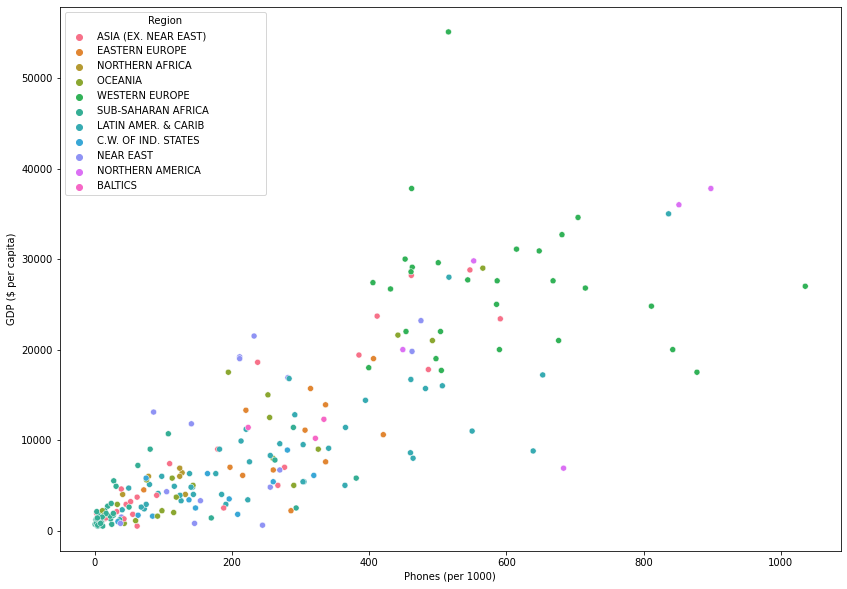

In [15]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Phones (per 1000)',y='GDP ($ per capita)',hue='Region')

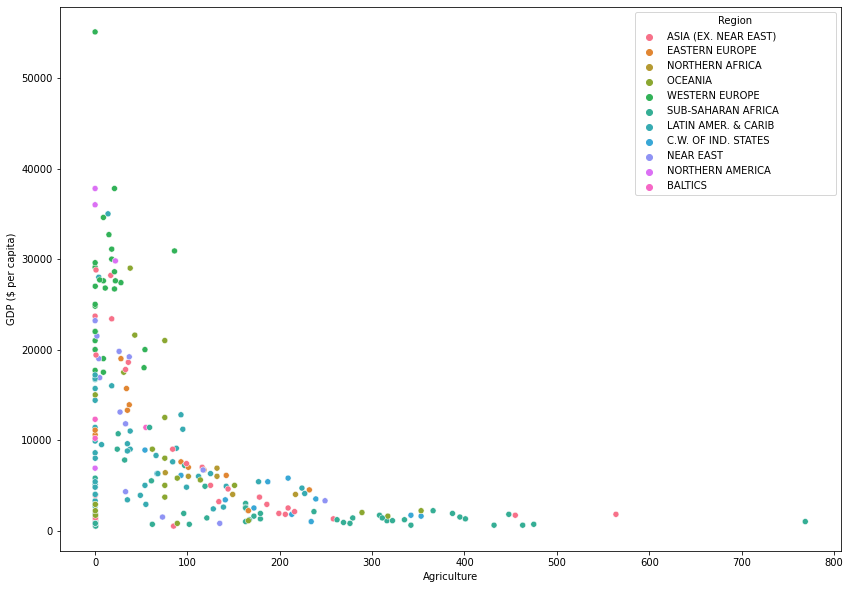

In [16]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Agriculture',y='GDP ($ per capita)',hue='Region')

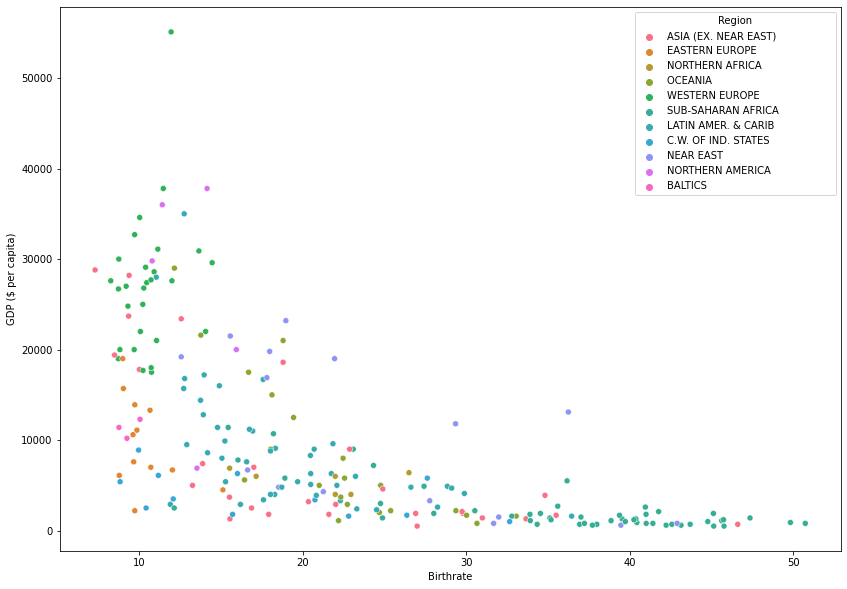

In [17]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=world,x='Birthrate',y='GDP ($ per capita)',hue='Region')

# Birthrate and Deathrate of Top 100 Countries

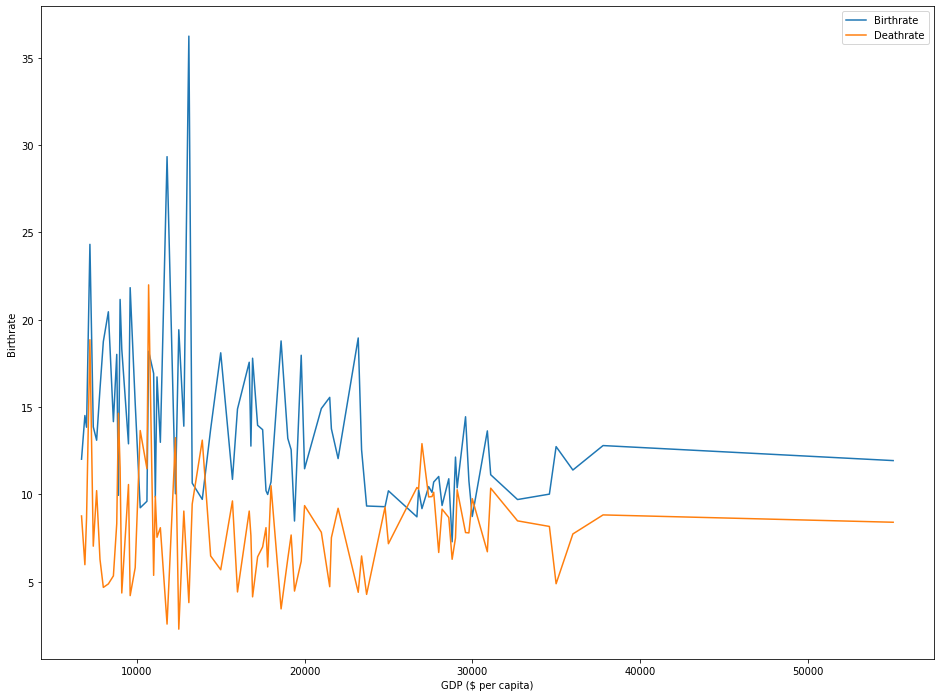

In [18]:
plt.figure(figsize=(16,12))
sns.lineplot(data=world.sort_values('GDP ($ per capita)',ascending=False).head(100),x='GDP ($ per capita)',y='Birthrate',ci=None,label='Birthrate')
sns.lineplot(data=world.sort_values('GDP ($ per capita)',ascending=False).head(100),x='GDP ($ per capita)',y='Deathrate',ci=None,label='Deathrate')

# Birthrate and Deathrate of Last 100 Countries

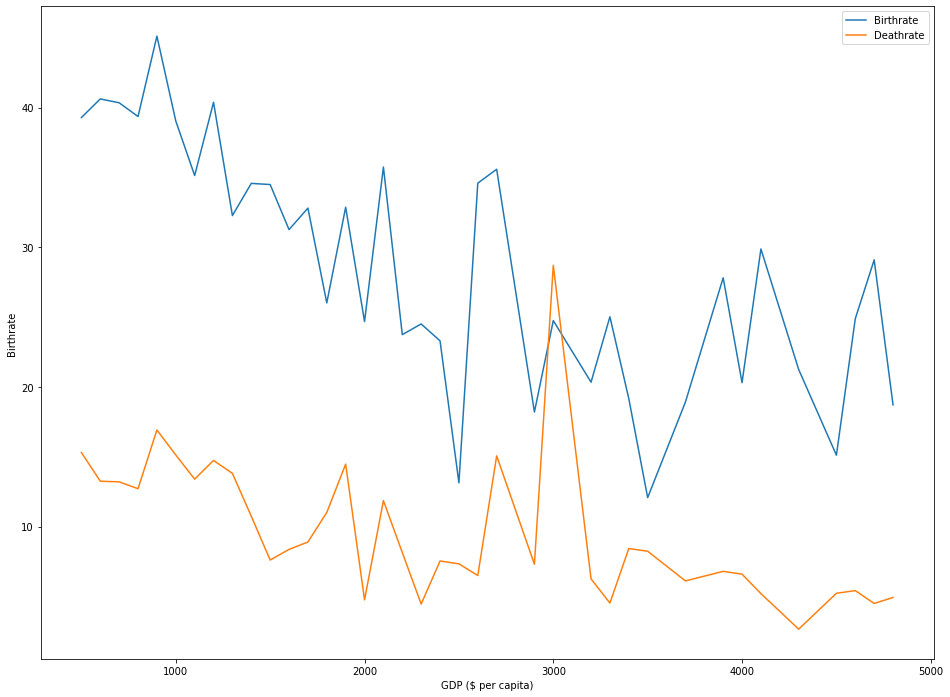

In [19]:
plt.figure(figsize=(16,12))
sns.lineplot(data=world.sort_values('GDP ($ per capita)',ascending=True).head(100),x='GDP ($ per capita)',y='Birthrate',ci=None,label='Birthrate')
sns.lineplot(data=world.sort_values('GDP ($ per capita)',ascending=True).head(100),x='GDP ($ per capita)',y='Deathrate',ci=None,label='Deathrate')

#  Comparison of the economy structure for the ten countries with highest total GDP

<Figure size 1152x864 with 0 Axes>

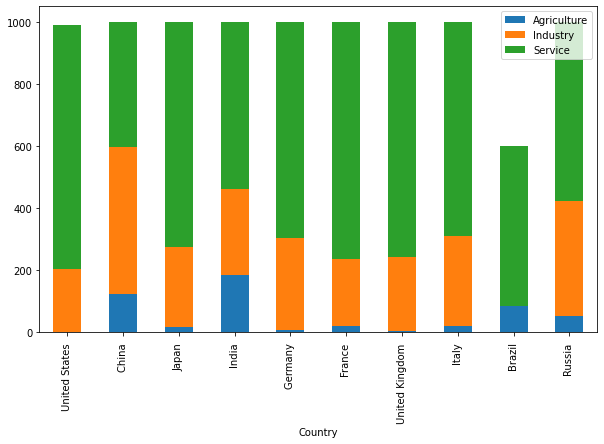

In [20]:
plt.figure(figsize=(16,12))
gdp[['Country','Agriculture', 'Industry', 'Service']].set_index('Country').head(10).plot.bar(stacked=True,figsize=(10,6))

# Modeling
# Training and Testing

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [22]:
LE = LabelEncoder()
world['Region_label'] = LE.fit_transform(world['Region'])
world['Climate_label'] = LE.fit_transform(world['Climate'])
world.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Total_GDP,Region_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,87.65,1.0,46.60,20.34,0.38,0.24,0.38,2.173990e+10,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,74.49,3.0,15.11,5.22,232.00,188.00,579.00,1.611745e+10,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,96.53,1.0,17.14,4.61,101.00,0.60,298.00,1.975805e+11,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,75.00,2.0,22.46,3.27,75.50,142.00,560.50,4.623520e+08,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,97.78,3.0,8.71,6.25,9.00,213.50,674.50,1.352819e+09,10,4


In [23]:
train, test = train_test_split(world, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Region_label',
       'Climate_label']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [24]:
print(train_X.shape) 
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(158, 15)
(158,)
(69, 15)
(69,)


# Linear Regression Model

In [25]:
model1 = LinearRegression()
model1.fit(train_X, train_Y)
train_pred_Y = model1.predict(train_X)
test_pred_Y = model1.predict(test_X)

In [26]:
from sklearn.metrics import r2_score

In [27]:
print('Training Score : ',model1.score(train_X,train_Y))
print(f'Test score : ',r2_score(test_pred_Y,test_Y))

Training Score :  0.8043500389122814
Test score :  0.4882384158287403


## Training Score : 73.71%
## Test score :  76.90%

# Visualization of Results

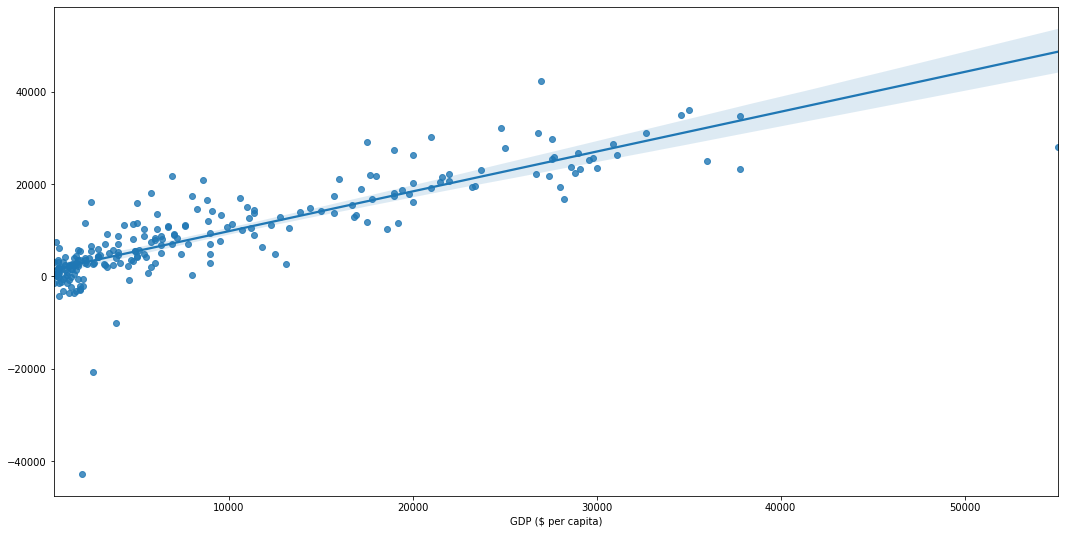

In [28]:
plt.figure(figsize=(18,9))
whole=model1.predict(world[training_features])
sns.regplot(x=world[target],y=whole) 

# Random Forest Regressor

In [29]:
model = RandomForestRegressor(n_estimators = 100,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)

In [30]:
print('Training Score :',model.score(train_X,train_Y))
print(f'Test score : ',r2_score(test_pred_Y,test_Y))

Training Score : 0.9019504013424262
Test score :  0.7746906880790072


## Training Score : 90.36%
## Test score :  76.15%

# Visualization of Results

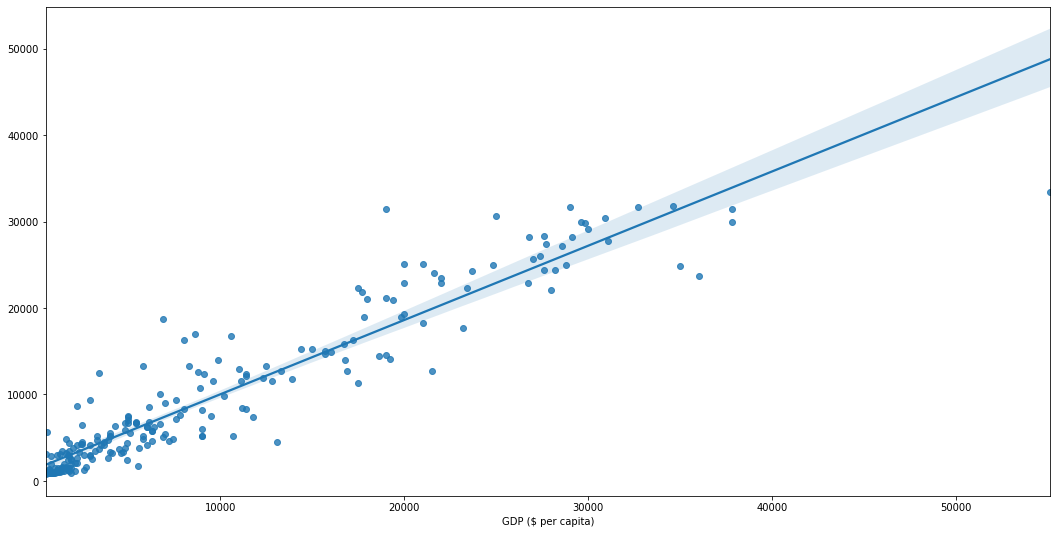

In [31]:
plt.figure(figsize=(18,9))
whole=model.predict(world[training_features])
sns.regplot(x=world[target],y=whole) 



# We will try to predict GDP per capita of Two Imaginary Countries
# 1.DreamLand : Better than Average in all features
# 2.MeanLand : Mean of all Countries

In [32]:
df = pd.DataFrame(columns = training_features)

In [33]:
df = df.append({'Population':500000000, 'Area (sq. mi.)':3287263,
       'Pop. Density (per sq. mi.)':152.0, 'Coastline (coast/area ratio)':2.0,
       'Net migration':0.0, 'Infant mortality (per 1000 births)':5,
       'Literacy (%)':99.0, 'Phones (per 1000)':1000,
       'Arable (%)':60, 'Crops (%)':10, 'Other (%)':30, 'Birthrate':10,
       'Deathrate':5, 'Region_label':0,
       'Climate_label':0},ignore_index = True) 
df = df.append({'Population':28740280, 'Area (sq. mi.)':598227,
       'Pop. Density (per sq. mi.)':379, 'Coastline (coast/area ratio)':21.16,
       'Net migration':0.03, 'Infant mortality (per 1000 births)':35.28,
       'Literacy (%)':83.58, 'Phones (per 1000)':234.62,
       'Arable (%)':13.7, 'Crops (%)':4.3, 'Other (%)':81.67, 'Birthrate':22.06,
       'Deathrate':9.19, 'Region_label':0,
       'Climate_label':0},ignore_index = True)
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Region_label,Climate_label
0,500000000.0,3287263.0,152.0,2.00,0.00,5.00,99.00,1000.00,60.0,10.0,30.00,10.00,5.00,0.0,0.0
1,28740280.0,598227.0,379.0,21.16,0.03,35.28,83.58,234.62,13.7,4.3,81.67,22.06,9.19,0.0,0.0


In [34]:
model.predict(df)

array([21570.88676046,  7061.58757909])

# Predicted GDP per capita
# DreamLand :  \$20946.20
# MeanLand : \$5438.23

# Thank You